# Libraries

In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.model_selection import train_test_split

from data_tools import *
from visualization_tools import *
from information_value import *
from ml_tools import *

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Config

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

LOAD_MODEL = False
MODEL_PATH = ".\models\model (0.9043, '28-11-2022 17-36').json"

TASK_TYPE = 'GPU'
GRID_SEARCH = False
SAVE_MODELS = True

# Loading data

In [3]:
data = pd.read_csv('heart.csv')

print('Raw data:')
data

Raw data:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
create_general_analysis(data)

General data analysis:

Shape of the table:      (918, 12)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
Age,918,0,100.0,50,"[77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 6...",int64
Sex,918,0,100.0,2,"[M, F]",object
ChestPainType,918,0,100.0,4,"[TA, NAP, ATA, ASY]",object
RestingBP,918,0,100.0,67,"[200, 192, 190, 185, 180, 178, 174, 172, 170, ...",int64
Cholesterol,918,0,100.0,222,"[603, 564, 529, 518, 491, 468, 466, 458, 417, ...",int64
FastingBS,918,0,100.0,2,"[1, 0]",int64
RestingECG,918,0,100.0,3,"[ST, Normal, LVH]",object
MaxHR,918,0,100.0,119,"[202, 195, 194, 192, 190, 188, 187, 186, 185, ...",int64
ExerciseAngina,918,0,100.0,2,"[Y, N]",object
Oldpeak,918,0,100.0,53,"[6.2, 5.6, 5.0, 4.4, 4.2, 4.0, 3.8, 3.7, 3.6, ...",float64


# Data visualization and analysis

## Distribution and target prevalence

### Quantitative features

Visualization of quantitative features distribution:

-----------------------------------------------------------------------------------------------
Feature: Age


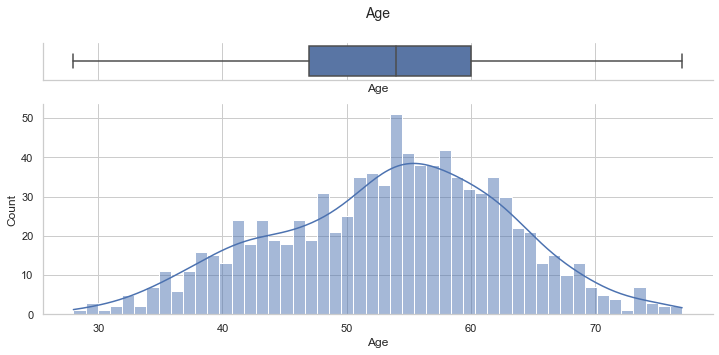


Feature statistics:


count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

-----------------------------------------------------------------------------------------------
Feature: RestingBP


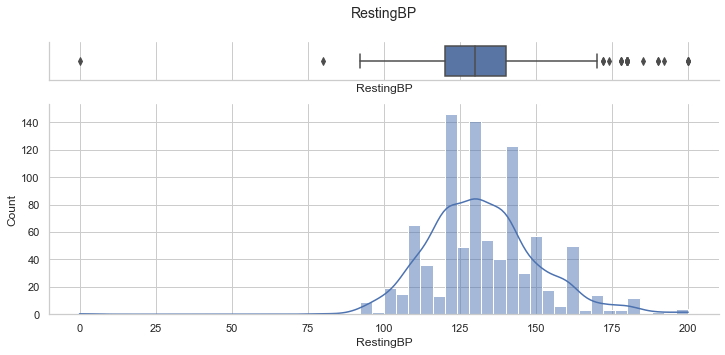


Feature statistics:


count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

-----------------------------------------------------------------------------------------------
Feature: Cholesterol


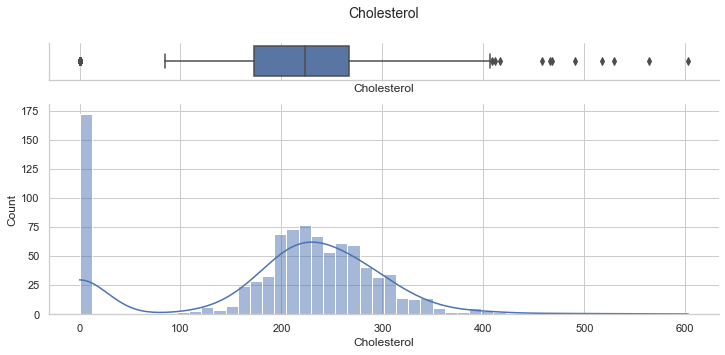


Feature statistics:


count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

-----------------------------------------------------------------------------------------------
Feature: MaxHR


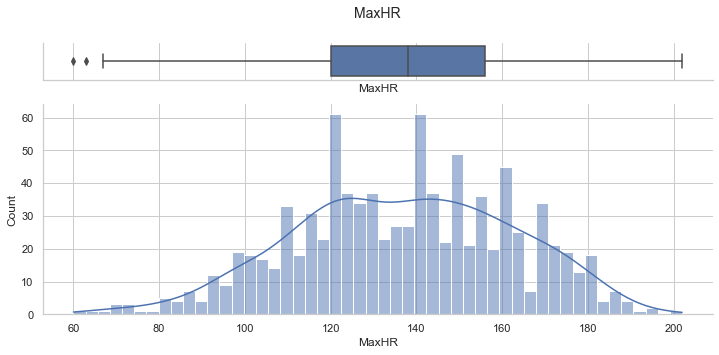


Feature statistics:


count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

-----------------------------------------------------------------------------------------------
Feature: Oldpeak


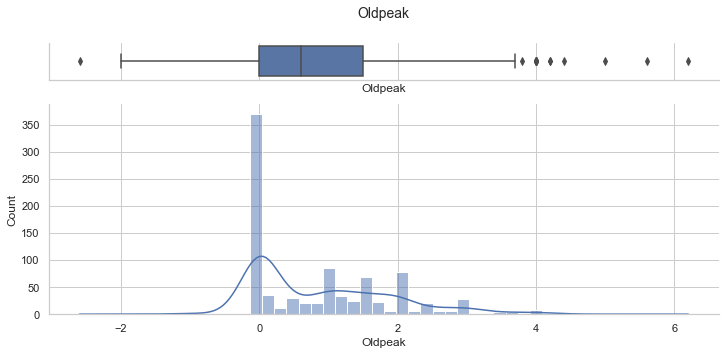


Feature statistics:


count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [5]:
create_visualization(data=data, type='quantitative', target='HeartDisease')

### Categorical features

Visualization of categorical features and target prevalence:

-----------------------------------------------------------------------------------------------
Feature: Sex


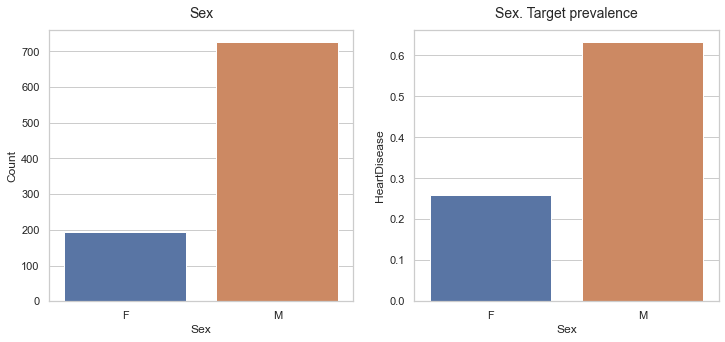


Feature statistics:


count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

-----------------------------------------------------------------------------------------------
Feature: ChestPainType


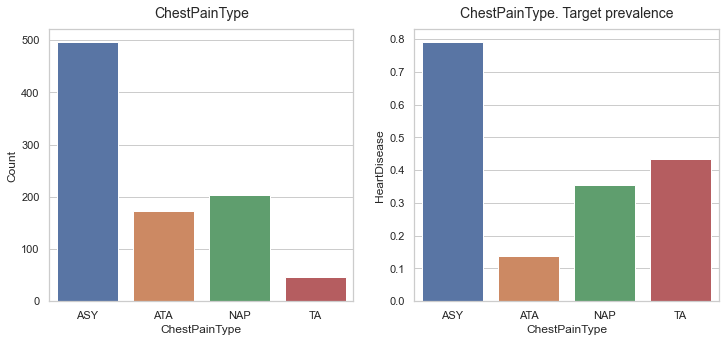


Feature statistics:


count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

-----------------------------------------------------------------------------------------------
Feature: FastingBS


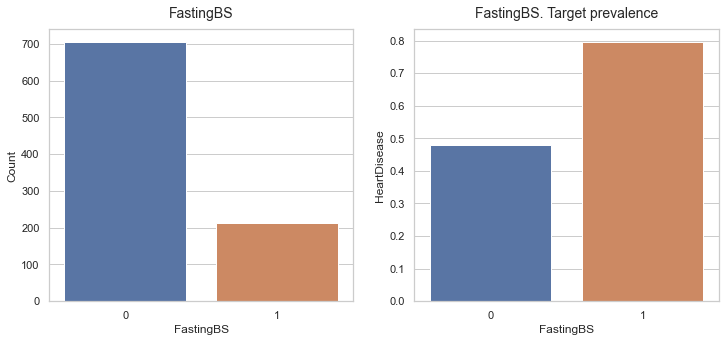


Feature statistics:


count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

-----------------------------------------------------------------------------------------------
Feature: RestingECG


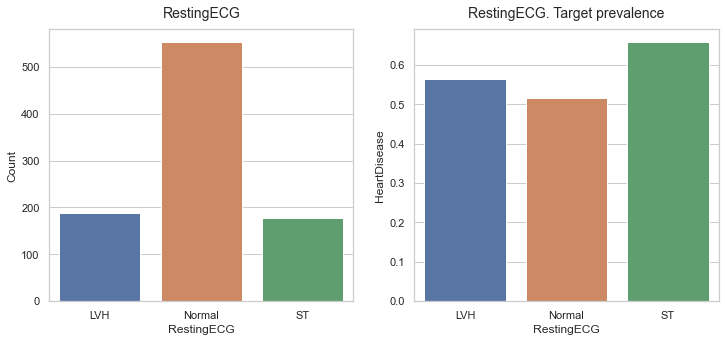


Feature statistics:


count        918
unique         3
top       Normal
freq         552
Name: RestingECG, dtype: object

-----------------------------------------------------------------------------------------------
Feature: ExerciseAngina


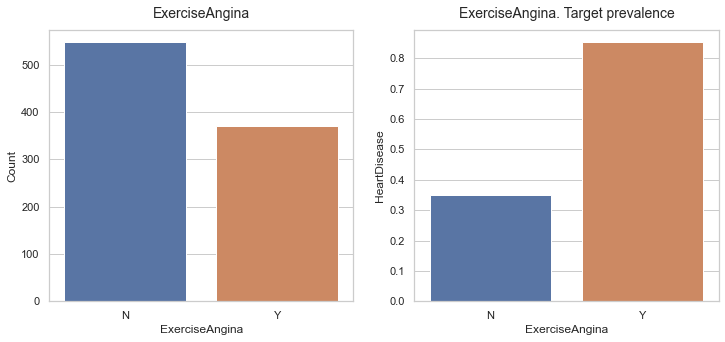


Feature statistics:


count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object

-----------------------------------------------------------------------------------------------
Feature: ST_Slope


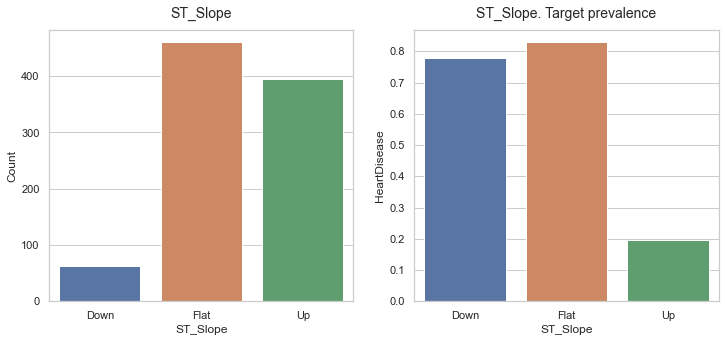


Feature statistics:


count      918
unique       3
top       Flat
freq       460
Name: ST_Slope, dtype: object

In [6]:
create_visualization(data=data, type='category', target='HeartDisease')

### Target distribution

Visualization of target distribution:

Target: HeartDisease


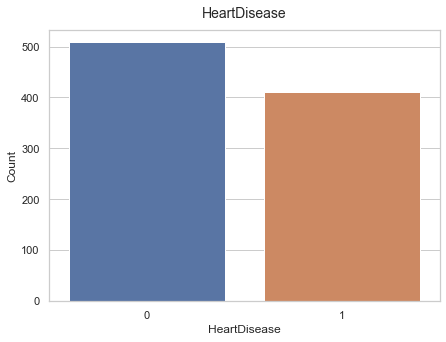


Target statistics:


count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [7]:
create_visualization(data=data, type='target', target='HeartDisease')

## Correlation between features and target

### Pearson correlation

Pearson correlation heatmap:


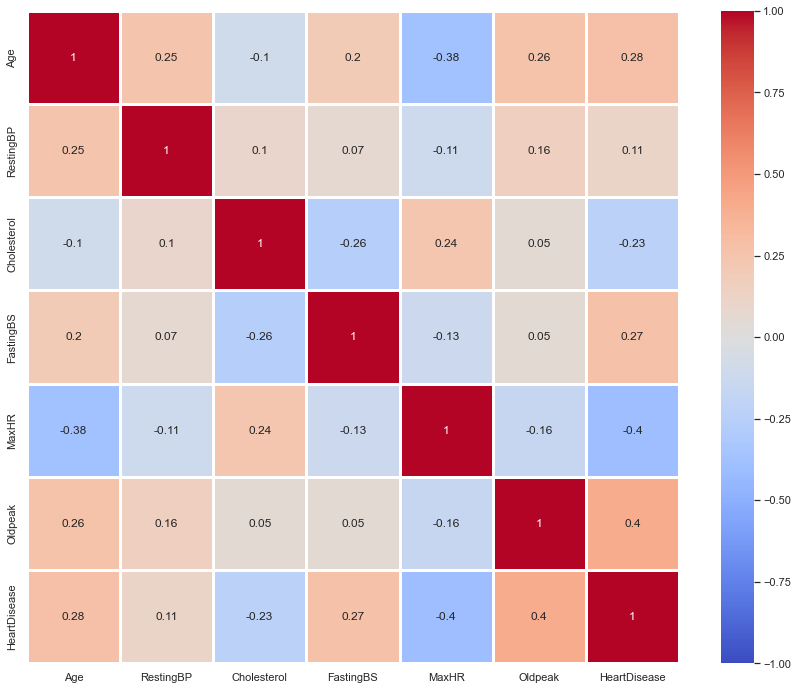

In [8]:
print('Pearson correlation heatmap:')

get_corr_map(data)

### Spearman correlation

Spearman correlation heatmap:


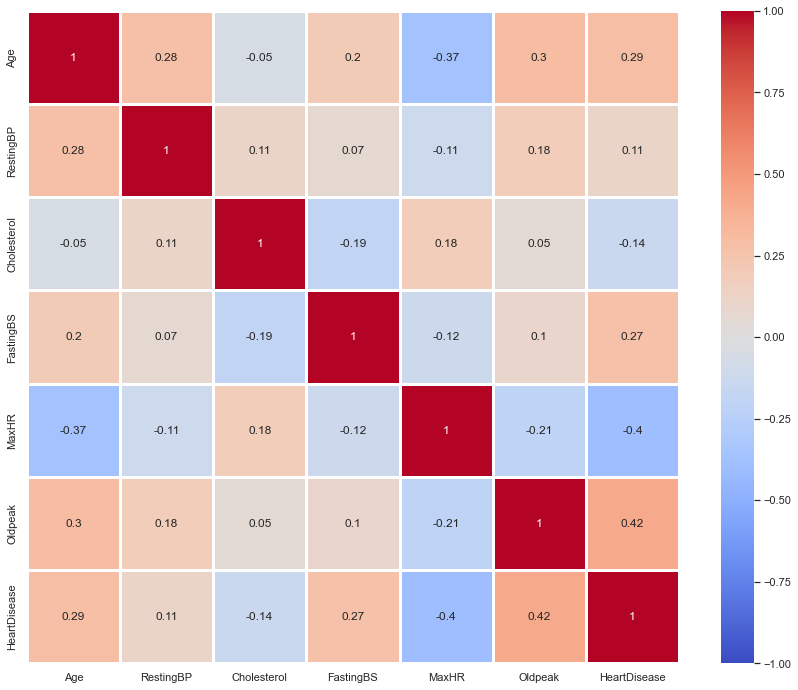

In [9]:
print('Spearman correlation heatmap:')

get_corr_map(data, 'spearman')

Parameters pairplots:


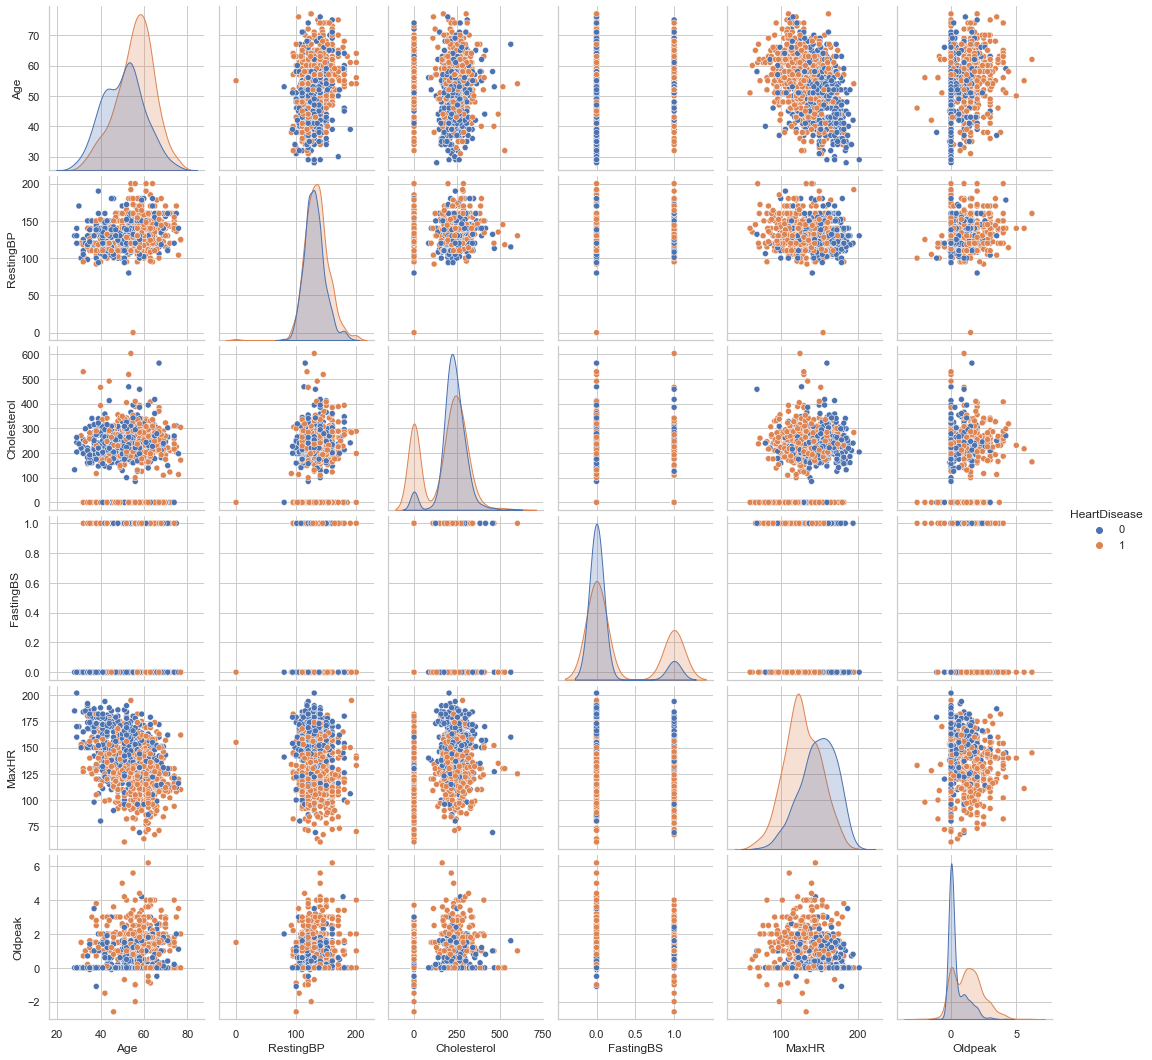

In [10]:
print('Parameters pairplots:')

sns.pairplot(data, hue='HeartDisease')
plt.show()

## Features information value and weight of evidence

In [11]:
iv, woe_iv = get_iv_woe(data.copy(), target_col='HeartDisease', max_bins=20)
iv = iv.sort_values(by='iv', ascending=False).reset_index(drop=True)

print(iv.shape, woe_iv.shape)
iv

------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.009 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.009 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.009 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.009 minutes
(11, 5) (43, 16)


,feature,iv,number_of_classes,feature_null_percent,remarks
0,ST_Slope,1.823753,3,0.0,categorical
1,ChestPainType,1.377321,4,0.0,categorical
2,ExerciseAngina,1.152925,2,0.0,categorical
3,Oldpeak,0.837978,6,0.0,binned monotonically
4,MaxHR,0.744990,6,0.0,binned monotonically
5,Sex,0.398176,2,0.0,categorical
6,Age,0.371875,4,0.0,binned monotonically
7,FastingBS,0.325352,2,0.0,categorical
8,Cholesterol,0.106325,2,0.0,binned forcefully
9,RestingBP,0.095739,4,0.0,binned monotonically


In [12]:
print('Weight of evidence and information value:')

woe_iv

Weight of evidence and information value:


,feature,sample_class,sample_class_label,sample_count,min_value,max_value,non_event_count,non_event_rate,event_count,event_rate,distbn_non_event,distbn_event,woe,iv,iv_sum,remarks
0,Age,"(27.999, 47.0]",0.0,239,28.0,47.0,154,0.644351,85,0.355649,0.375610,0.167323,0.808626,0.168426,0.371875,binned monotonically
1,Age,"(47.0, 54.0]",1.0,232,48.0,54.0,120,0.517241,112,0.482759,0.292683,0.220472,0.283317,0.020458,0.371875,binned monotonically
2,Age,"(54.0, 60.0]",2.0,226,55.0,60.0,76,0.336283,150,0.663717,0.185366,0.295276,-0.465578,0.051172,0.371875,binned monotonically
3,Age,"(60.0, 77.0]",3.0,221,61.0,77.0,60,0.271493,161,0.728507,0.146341,0.316929,-0.772736,0.131819,0.371875,binned monotonically
4,Age,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,0.000000,0.000000,NaN,NaN,0.371875,binned monotonically
5,Sex,F,NaN,193,F,F,143,0.740933,50,0.259067,0.348780,0.098425,1.265146,0.316736,0.398176,categorical
6,Sex,M,NaN,725,M,M,267,0.368276,458,0.631724,0.651220,0.901575,-0.325296,0.081440,0.398176,categorical
7,ChestPainType,ASY,NaN,496,ASY,ASY,104,0.209677,392,0.790323,0.253659,0.771654,-1.112547,0.576294,1.377321,categorical
8,ChestPainType,ATA,NaN,173,ATA,ATA,149,0.861272,24,0.138728,0.363415,0.047244,2.040217,0.645056,1.377321,categorical
9,ChestPainType,NAP,NaN,203,NAP,NAP,131,0.645320,72,0.354680,0.319512,0.141732,0.812855,0.144509,1.377321,categorical


# Dataset creation and features construction

In [13]:
ds = pd.DataFrame(
    {
        # Categorical features
        'c_age':                pd.cut(data['Age'], round((data['Age'].max() - data['Age'].min()) / 5)).astype('object').apply(str),
        'c_chest_pain':         data['ChestPainType'],
        'c_resting_bp':         pd.qcut(data['RestingBP'], q=5).astype('object').apply(str),
        'c_cholesterol':        data['Cholesterol'].reset_index().merge(
                                    pd.qcut(data[data['Cholesterol'] > 0]['Cholesterol'], q = 3).reset_index(),
                                    on='index', how='left')['Cholesterol_y'].astype('object').apply(str).fillna('[0 - 0]'),
        'c_resting_ecg':        data['RestingECG'],
        'c_max_hr':             pd.qcut(data['MaxHR'], 10).astype('object').apply(str),
        'c_exercise_angina':    data['ExerciseAngina'],
        'c_oldpeak':            data['Oldpeak'].apply(get_oldpeak_cats),
        'c_st_slope':           data['ST_Slope'],

        # Binary features
        'b_gender':             data['Sex'], # .apply(lambda x: 1.0 if x == 'M' else 0.0),
        'b_fasting_bs':         data['FastingBS'].astype('object'),

        # Target
        'target':               data['HeartDisease']
    }
)

print('No columns and rows are missing:', ds.shape == data.shape)
print('DS shape:                       ', ds.shape)
print()
ds

No columns and rows are missing: True
DS shape:                        (918, 12)



,c_age,c_chest_pain,c_resting_bp,c_cholesterol,c_resting_ecg,c_max_hr,c_exercise_angina,c_oldpeak,c_st_slope,b_gender,b_fasting_bs,target
0,"(37.8, 42.7]",ATA,"(135.2, 145.0]","(263.0, 603.0]",Normal,"(170.0, 202.0]",N,[0 - 0],Up,M,0,0
1,"(47.6, 52.5]",NAP,"(145.0, 200.0]","(84.999, 217.0]",Normal,"(151.0, 160.0]",N,(0 - 1],Flat,F,0,1
2,"(32.9, 37.8]",ATA,"(128.0, 135.2]","(263.0, 603.0]",ST,"(59.999, 103.0]",N,[0 - 0],Up,M,0,0
3,"(47.6, 52.5]",ASY,"(135.2, 145.0]","(84.999, 217.0]",Normal,"(103.0, 115.0]",Y,(1 - 2],Flat,F,0,1
4,"(52.5, 57.4]",NAP,"(145.0, 200.0]","(84.999, 217.0]",Normal,"(115.0, 122.0]",N,[0 - 0],Up,M,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,"(42.7, 47.6]",TA,"(-0.001, 120.0]","(263.0, 603.0]",Normal,"(130.0, 138.0]",N,(1 - 2],Flat,M,0,1
914,"(67.2, 72.1]",ASY,"(135.2, 145.0]","(84.999, 217.0]",Normal,"(138.0, 144.0]",N,3+,Flat,M,1,1
915,"(52.5, 57.4]",ASY,"(128.0, 135.2]","(84.999, 217.0]",Normal,"(103.0, 115.0]",Y,(1 - 2],Flat,M,0,1
916,"(52.5, 57.4]",ATA,"(128.0, 135.2]","(217.0, 263.0]",LVH,"(170.0, 202.0]",N,[0 - 0],Flat,F,0,1


In [14]:
create_general_analysis(ds)

General data analysis:

Shape of the table:      (918, 12)
Duplicates in the table: 9, (0.98%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
c_age,918,0,100.0,10,"[(72.1, 77.0], (67.2, 72.1], (62.3, 67.2], (57...",object
c_chest_pain,918,0,100.0,4,"[TA, NAP, ATA, ASY]",object
c_resting_bp,918,0,100.0,5,"[(145.0, 200.0], (135.2, 145.0], (128.0, 135.2...",object
c_cholesterol,918,0,100.0,4,"[nan, (84.999, 217.0], (263.0, 603.0], (217.0,...",object
c_resting_ecg,918,0,100.0,3,"[ST, Normal, LVH]",object
c_max_hr,918,0,100.0,10,"[(59.999, 103.0], (170.0, 202.0], (160.0, 170....",object
c_exercise_angina,918,0,100.0,2,"[Y, N]",object
c_oldpeak,918,0,100.0,6,"[[0 - 0], 3+, 0-, (2 - 3], (1 - 2], (0 - 1]]",object
c_st_slope,918,0,100.0,3,"[Up, Flat, Down]",object
b_gender,918,0,100.0,2,"[M, F]",object


# Features visualization

Visualization of categorical features and target prevalence:

-----------------------------------------------------------------------------------------------
Feature: c_age


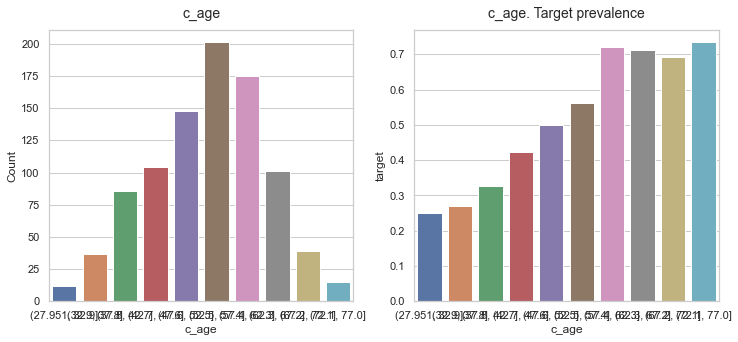


Feature statistics:


count              918
unique              10
top       (52.5, 57.4]
freq               201
Name: c_age, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_chest_pain


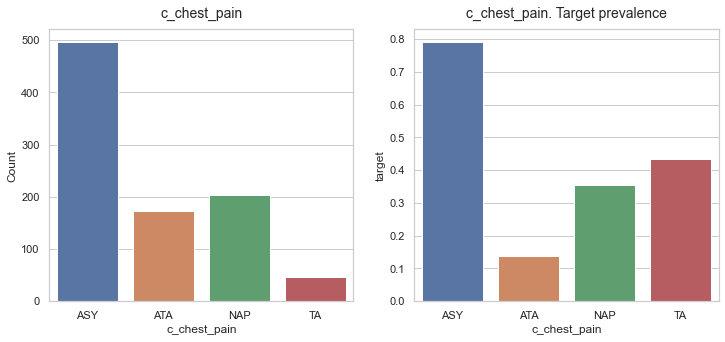


Feature statistics:


count     918
unique      4
top       ASY
freq      496
Name: c_chest_pain, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_resting_bp


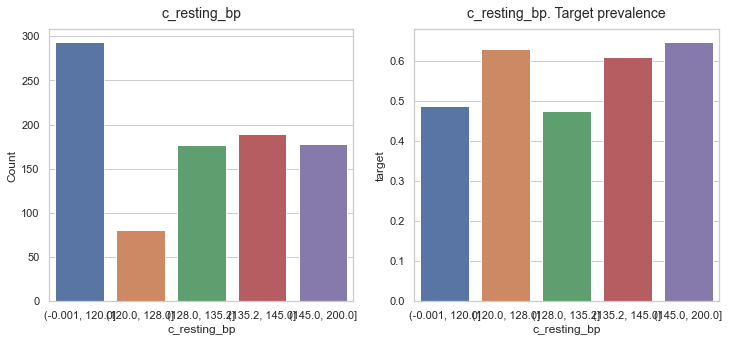


Feature statistics:


count                 918
unique                  5
top       (-0.001, 120.0]
freq                  293
Name: c_resting_bp, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_cholesterol


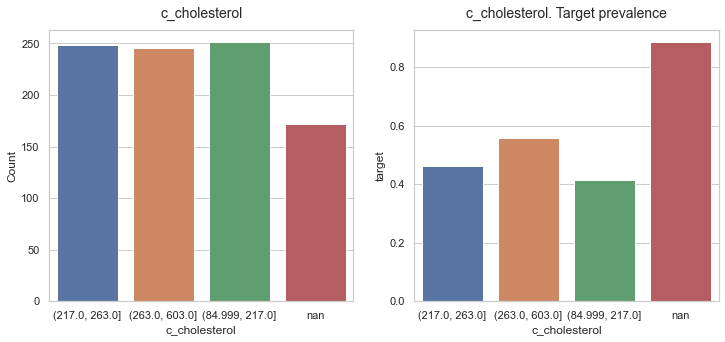


Feature statistics:


count                 918
unique                  4
top       (84.999, 217.0]
freq                  251
Name: c_cholesterol, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_resting_ecg


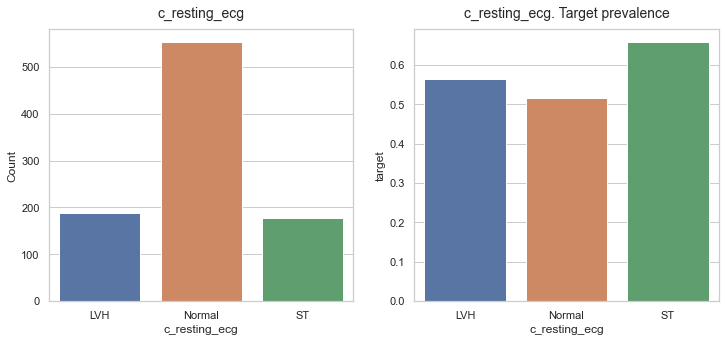


Feature statistics:


count        918
unique         3
top       Normal
freq         552
Name: c_resting_ecg, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_max_hr


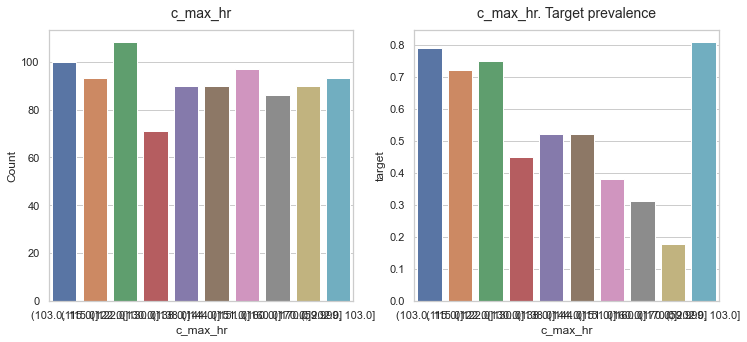


Feature statistics:


count                918
unique                10
top       (122.0, 130.0]
freq                 108
Name: c_max_hr, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_exercise_angina


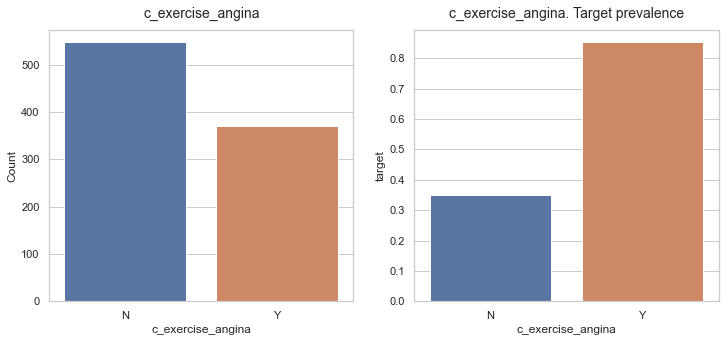


Feature statistics:


count     918
unique      2
top         N
freq      547
Name: c_exercise_angina, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_oldpeak


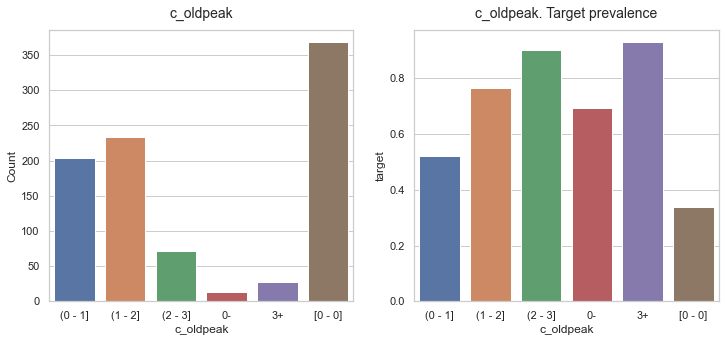


Feature statistics:


count         918
unique          6
top       [0 - 0]
freq          368
Name: c_oldpeak, dtype: object

-----------------------------------------------------------------------------------------------
Feature: c_st_slope


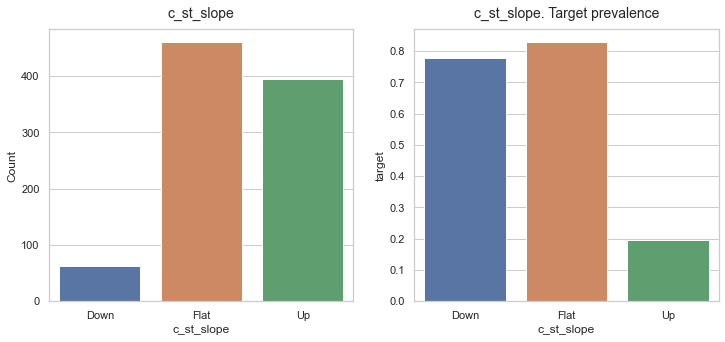


Feature statistics:


count      918
unique       3
top       Flat
freq       460
Name: c_st_slope, dtype: object

-----------------------------------------------------------------------------------------------
Feature: b_gender


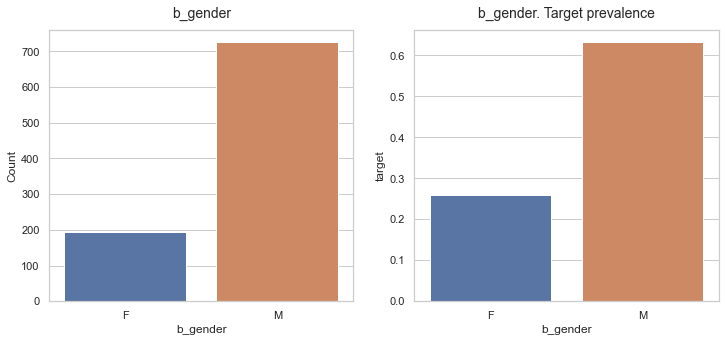


Feature statistics:


count     918
unique      2
top         M
freq      725
Name: b_gender, dtype: object

-----------------------------------------------------------------------------------------------
Feature: b_fasting_bs


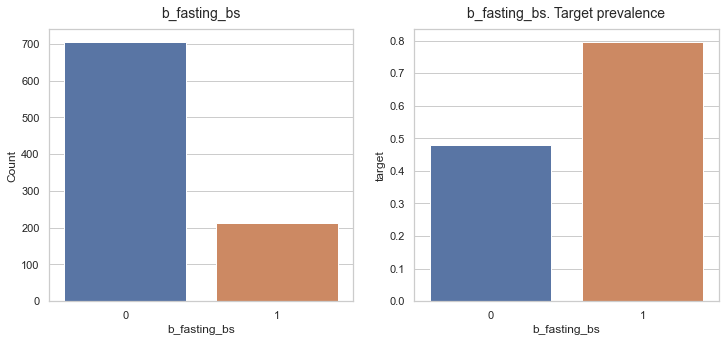


Feature statistics:


count     918
unique      2
top         0
freq      704
Name: b_fasting_bs, dtype: int64

In [15]:
create_visualization(ds, 'category', target='target')

# Preprocessing

In [16]:
X = ds.drop('target', axis=1)
y = ds['target']

print('Features shape:', X.shape)
print('Target shape: ', y.shape)

Features shape: (918, 11)
Target shape:  (918,)


In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

print('Sampling was successful!')
print('\n')
print('The shape of the training set for independent features:  ', X_train.shape)
print('The shape of the training set for target:                ', y_train.shape)
print()
print('The shape of the validation set for independent features:', X_val.shape)
print('The shape of the validation set for target:              ', y_val.shape)

Sampling was successful!


The shape of the training set for independent features:   (688, 11)
The shape of the training set for target:                 (688,)

The shape of the validation set for independent features: (230, 11)
The shape of the validation set for target:               (230,)


# Using the CatBoost Model

## Model training

In [18]:
%%time

if LOAD_MODEL:
    model = CatBoostClassifier()
    model.load_model(MODEL_PATH, format='json')
else: # grid searching and training model
    model = get_trained_model(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val,
                              cat_features=list(X_train.columns),
                              random_state=RANDOM_STATE, task_type=TASK_TYPE, gridsearch=GRID_SEARCH, save=SAVE_MODELS)

print("Model's hyperparameters:", model.get_params())
print()
print('Accuracy on train dataset:     ', round(model.score(X_train, y_train), 4))
print('Accuracy on validation dataset:', round(model.score(X_val, y_val), 4))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



The model has been successfully trained!
Model's hyperparameters: {'iterations': 5000, 'learning_rate': 0.003, 'depth': 6, 'use_best_model': True, 'verbose': False, 'auto_class_weights': 'Balanced', 'boosting_type': 'Ordered', 'task_type': 'GPU', 'random_state': 42, 'early_stopping_rounds': 150, 'cat_features': ['c_age', 'c_chest_pain', 'c_resting_bp', 'c_cholesterol', 'c_resting_ecg', 'c_max_hr', 'c_exercise_angina', 'c_oldpeak', 'c_st_slope', 'b_gender', 'b_fasting_bs']}

Accuracy on train dataset:      0.9012
Accuracy on validation dataset: 0.9043
Wall time: 3min 16s


## Model evaluation

Metrics values:


,metrics,score
0,accuracy,0.904348
1,precision,0.900763
2,recall,0.929134
3,f1,0.914729
4,auc,0.939454


Confusion Matrix:


,0,1
0,90,13
1,9,118



Visualization of metrics:


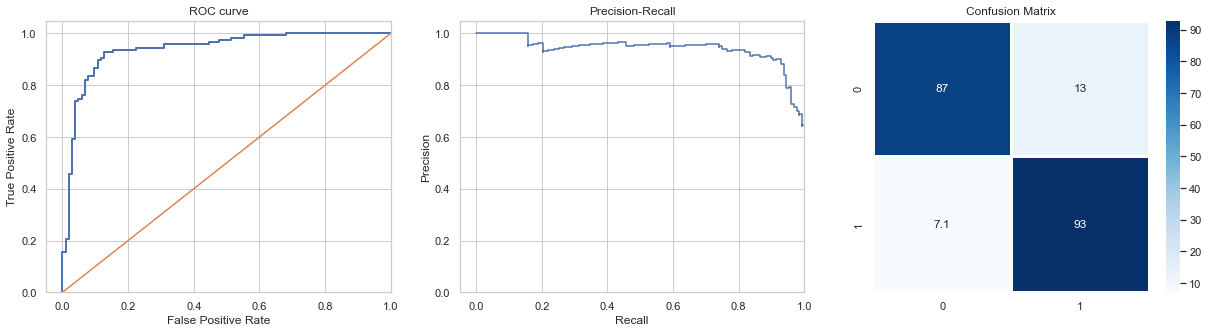

In [19]:
create_metrics(model=model, X=X_val, y=y_val, only_result=False)

## Cross validation

In [20]:
%%time

cv_res = create_cv(model=model, X=X_val, y=y_val, cat_features=list(X.columns), folds=10, random_state=RANDOM_STATE)

print('Cross validation results:')
print()
print('Average AUC    :', cv_res['test-AUC-mean'].mean())
print('Average AUC-std:', cv_res['test-AUC-std'].mean())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 0.3372102679
bestIteration = 1187

Training on fold [1/10]

bestTest = 0.4062058066
bestIteration = 1643

Training on fold [2/10]

bestTest = 0.1818574679
bestIteration = 4980

Training on fold [3/10]

bestTest = 0.4054093417
bestIteration = 3019

Training on fold [4/10]

bestTest = 0.127152696
bestIteration = 4964

Training on fold [5/10]

bestTest = 0.4328720286
bestIteration = 762

Training on fold [6/10]

bestTest = 0.3662657556
bestIteration = 1467

Training on fold [7/10]

bestTest = 0.1084154964
bestIteration = 4998

Training on fold [8/10]

bestTest = 0.2140423671
bestIteration = 2903

Training on fold [9/10]

bestTest = 0.5755808634
bestIteration = 335

Cross validation results:

Average AUC    : 0.918021124125961
Average AUC-std: 0.0799694649923878
Wall time: 23min 18s


## Feature importance

### Most important features in the formula

Feature importances:


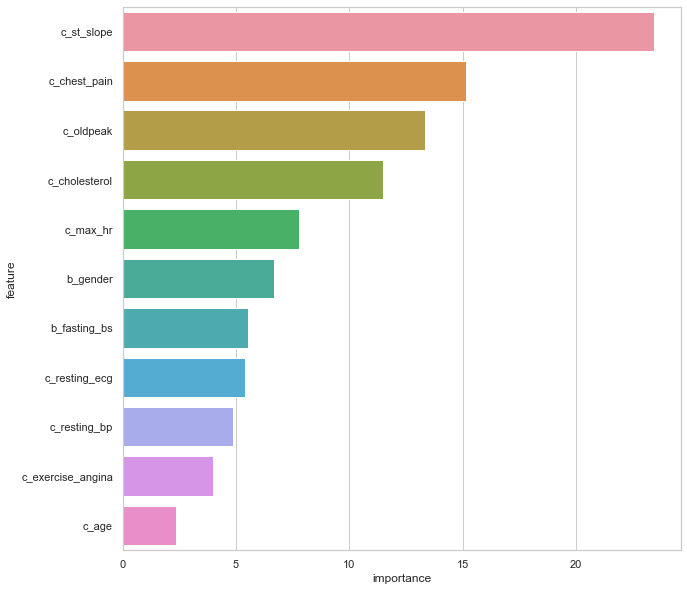

In [21]:
get_feature_importances(model=model, X_train=X_train)

### The contribution of each feature to the formula

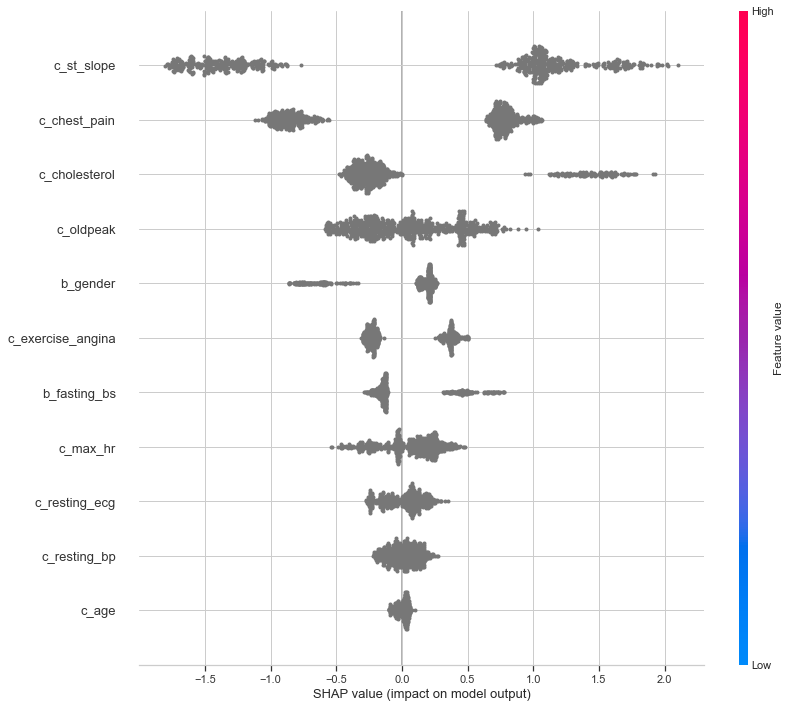

In [23]:
get_shap(model, X_train, y_train)